In [1]:
import os
os.getcwd()

'/Users/emmanuelmaduneme/Documents/Data Science Track/Projects'

In [2]:
import pandas as pd
import numpy as np
print("You are running Pandas version:", pd.__version__)

You are running Pandas version: 2.3.2


In [46]:
diabetes =  pd.read_csv("diabetes_prediction_dataset.csv", low_memory=False)

In [12]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [47]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
diabetes.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Plotting


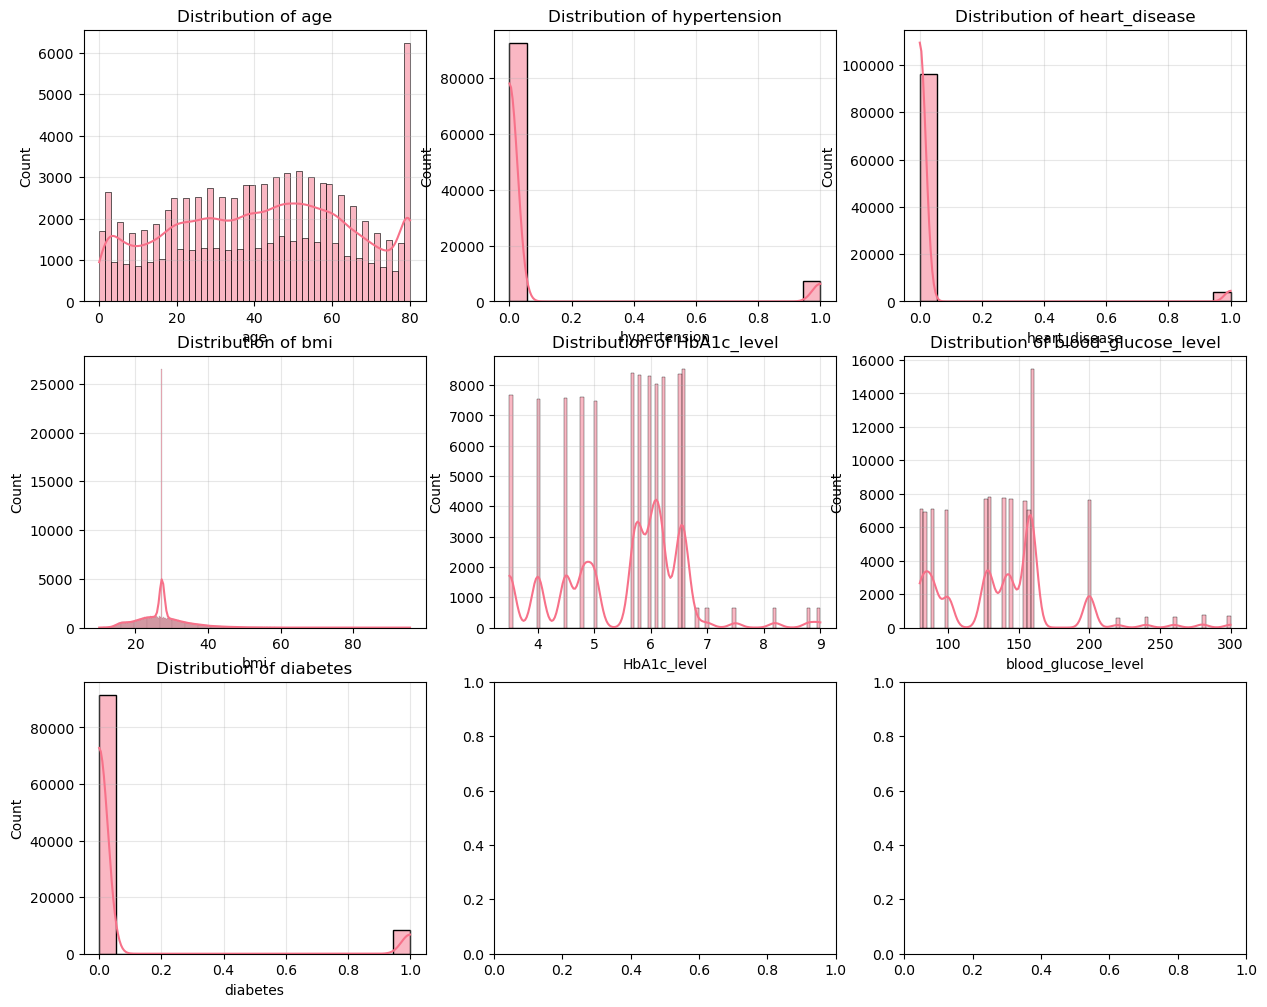

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Get numeric columns
numeric_cols = diabetes.select_dtypes(include = ["float64", "int64"]).columns

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=diabetes, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(True, alpha=0.3)


## Class Imbalance

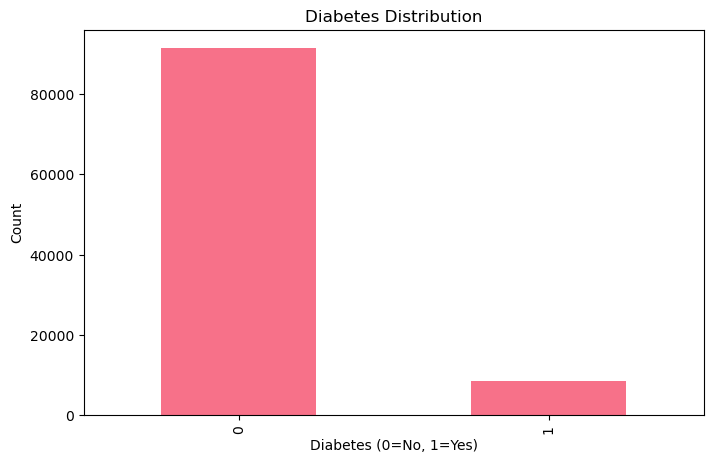

In [38]:
# 1. Check target variable distribution
plt.figure(figsize=(8, 5))
diabetes['diabetes'].value_counts().plot(kind='bar')
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [56]:
diabetes.head()
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


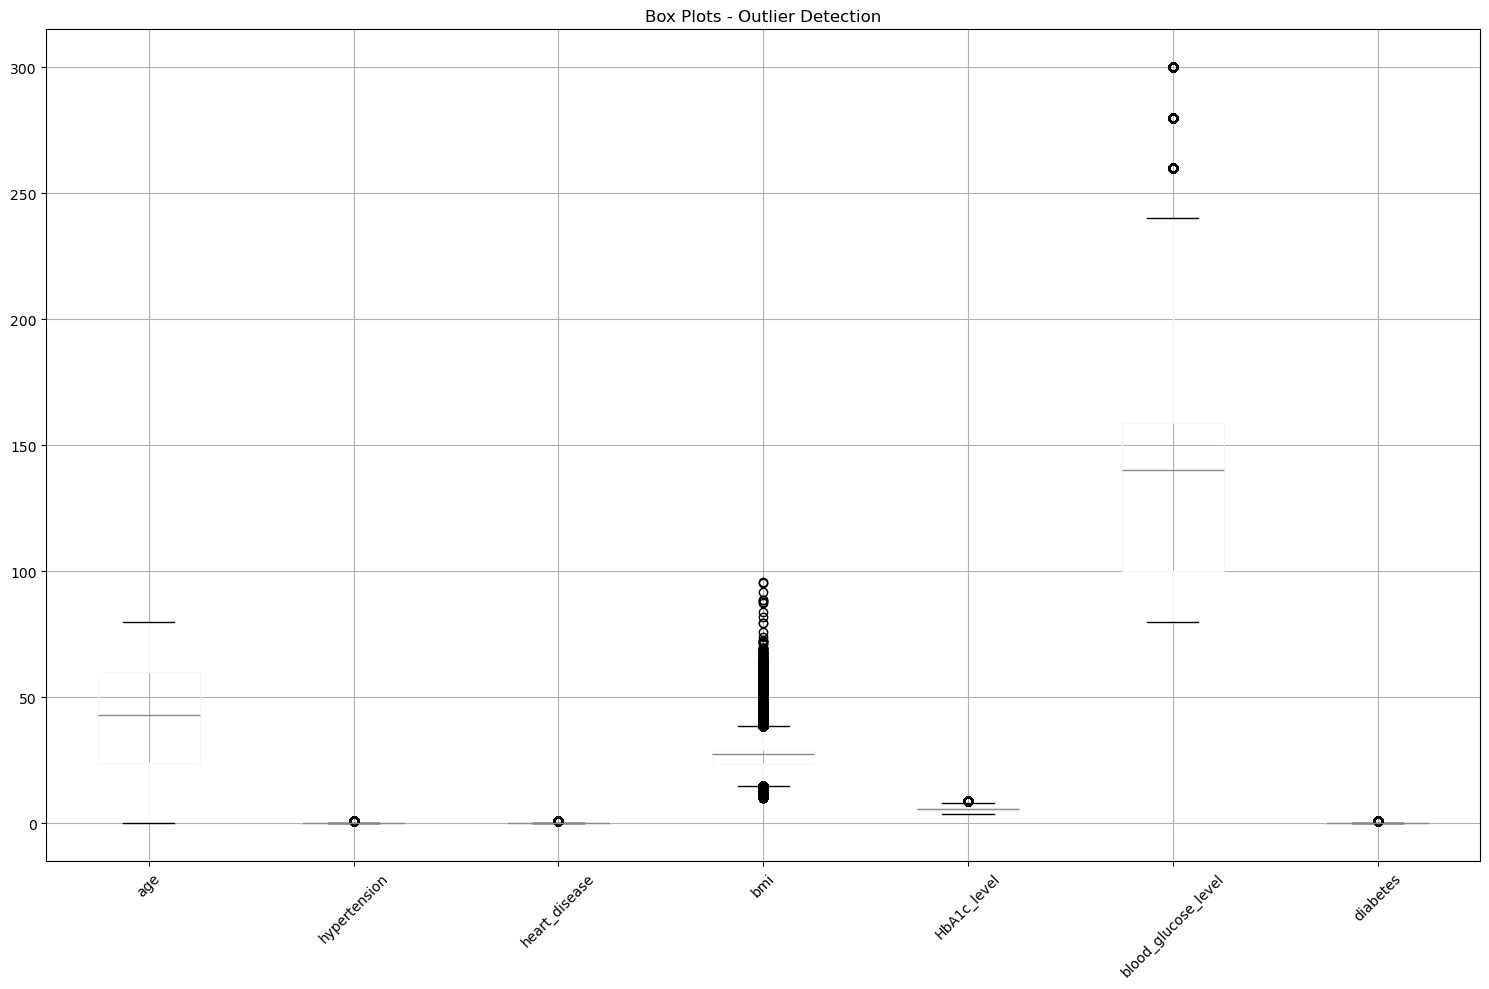

In [57]:
# 3. Check for outliers and data quality issues
diabetes.boxplot(figsize=(15, 10))
plt.title('Box Plots - Outlier Detection')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
diabetes['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64

In [69]:


print(diabetes['gender'].value_counts())
print(f"\nGender Percentages:")
print(diabetes['gender'].value_counts(normalize=True) * 100) ## normalize returns proportions 

print("\n" + "="*50)

print("Smoking History Distribution:")
print(diabetes['smoking_history'].value_counts())
print(f"\nSmoking History Percentages:")
print(diabetes['smoking_history'].value_counts(normalize=True) * 100)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Gender Percentages:
gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64

Smoking History Distribution:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Smoking History Percentages:
smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: proportion, dtype: float64


In [39]:
diabetes['gender'] = (diabetes['gender'] == 'Female').astype(int)

print(diabetes['gender'].value_counts())

gender
1    58552
0    41448
Name: count, dtype: int64


In [70]:
# 5. Examine relationship between categorical variables and diabetes
print("Diabetes Rate by Gender:")
pd.crosstab(diabetes['gender'], diabetes['diabetes'], normalize='index') * 100

print("\n" + "="*60)

print("Diabetes Rate by Smoking History:")
pd.crosstab(diabetes['smoking_history'], diabetes['diabetes'], normalize='index') * 100


Diabetes Rate by Gender:

Diabetes Rate by Smoking History:


diabetes,0,1
smoking_history,,
No Info,95.940362,4.059638
current,89.791083,10.208917
ever,88.211788,11.788212
former,82.998289,17.001711
never,90.465878,9.534122
not current,89.297348,10.702652


In [71]:
# 6. Compare numerical features between diabetic and non-diabetic groups
diabetes.groupby('diabetes')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean()

,age,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,
0,40.115187,26.887163,5.396761,132.852470
1,60.946588,31.988382,6.934953,194.094706


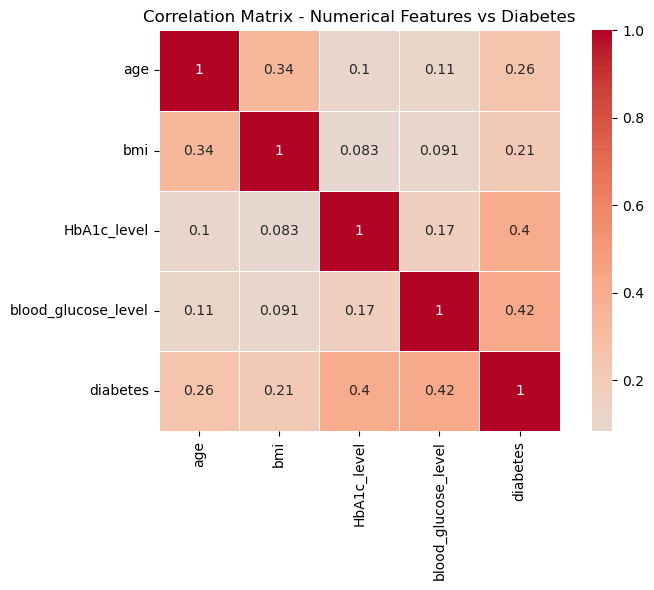

In [72]:
# 7. Correlation matrix for numerical features
correlation_matrix = diabetes[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features vs Diabetes')
plt.tight_layout()
plt.show()

## Diabetes Dataset - EDA Summary

## Dataset Overview
- **Size**: 100,000 records × 9 features
- **Target**: Diabetes (binary: 0=No, 1=Yes)
- **Memory Usage**: 6.9+ MB
- **Data Quality**: No missing values, clean dataset

## Key Findings

### 1. Class Imbalance ⚠️
- **Non-diabetic**: 91,500 cases (91.5%)
- **Diabetic**: 8,500 cases (8.5%)
- **Action Required**: Address imbalance before modeling (SMOTE, class weights, etc.)

### 2. Target Variable Relationships

#### Numerical Features (Diabetic vs Non-Diabetic Means):
| Feature | Non-Diabetic | Diabetic | Difference |
|---------|--------------|----------|------------|
| **Age** | 40.1 years | 60.9 years | **+20.8 years** |
| **BMI** | 26.9 | 32.0 | **+5.1 points** |
| **HbA1c** | 5.4% | 6.9% | **+1.5%** (above 6.5% threshold) |
| **Blood Glucose** | 132.9 mg/dL | 194.1 mg/dL | **+61.2 mg/dL** |

#### Categorical Features - Diabetes Rates:
| Smoking History | Diabetes Rate | Risk Level |
|-----------------|---------------|------------|
| **Former smoker** | **17.0%** | Highest risk |
| **Ever smoker** | **11.8%** | High risk |
| **Current smoker** | **10.2%** | Moderate risk |
| **Never smoker** | **9.5%** | Lower risk |
| **No Info** | **4.1%** | Suspicious (data quality issue?) |

### 3. Feature Correlations with Diabetes
1. **Blood Glucose Level**: 0.42 (strongest predictor)
2. **HbA1c Level**: 0.40 (second strongest)
3. **Age**: 0.26 (moderate correlation)
4. **BMI**: 0.21 (weakest but meaningful)

### 4. Data Quality Assessment
✅ **Good**:
- No missing values
- Realistic value ranges for all features
- Clean binary variables (0/1)

⚠️ **Monitor**:
- BMI outliers (>50) - likely legitimate for diabetes dataset
- Blood glucose outliers (>250) - expected in diabetic patients
- Age spike at 80 - possible data capping

### 5. Multicollinearity Check
- **Low inter-feature correlations** (all <0.35)
- Age-BMI correlation: 0.34 (highest, but acceptable)
- HbA1c-Blood Glucose: 0.17 (surprisingly independent)
- **Conclusion**: All features contribute unique information

## Modeling Recommendations

### Preprocessing Steps:
1. **Handle class imbalance** with SMOTE or class weights
2. **Encode categorical variables**: One-hot encoding for smoking_history, gender
3. **Scale numerical features**: StandardScaler for age, BMI, HbA1c, blood_glucose
4. **Stratified train-test split** to maintain class proportions

### Feature Engineering Ideas:
- BMI categories (underweight, normal, overweight, obese)
- Age groups (young, middle-aged, elderly)
- Combine smoking categories (never/former/current)
- Clinical risk scores combining multiple features

### Evaluation Strategy:
- **Primary metrics**: Precision, Recall, F1-Score, ROC-AUC
- **Avoid accuracy** due to class imbalance
- **Focus on recall** for diabetes detection (minimize false negatives)
- Use **stratified cross-validation**

### Expected Model Performance:
- Strong predictive features identified (Blood Glucose, HbA1c, Age)
- Low multicollinearity suggests good model stability
- Class imbalance will be main modeling challenge

In [73]:
# 8. Prepare features and target for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# Split the data (stratified due to class imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training class distribution:\n{y_train.value_counts(normalize=True)}")




Training set size: (80000, 8)
Test set size: (20000, 8)
Training class distribution:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [76]:
# 9. Baseline model with proper encoding and class imbalance handling
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define preprocessing pipeline
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Proper encoding!
    ])

# Fit preprocessing and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"After one-hot encoding: {X_train_processed.shape[1]}")


Original features: 8
After one-hot encoding: 11

=== BASELINE MODEL PERFORMANCE ===
ROC-AUC Score: 0.9643

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.93      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [77]:


# Train baseline model with balanced class weights
rf_baseline = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced'
)

rf_baseline.fit(X_train_processed, y_train)

# Make predictions
y_pred = rf_baseline.predict(X_test_processed)
y_pred_proba = rf_baseline.predict_proba(X_test_processed)[:, 1]

# Evaluate
print("\n=== BASELINE MODEL PERFORMANCE ===")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== BASELINE MODEL PERFORMANCE ===
ROC-AUC Score: 0.9643

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.93      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [80]:
# 10. Improve recall with SMOTE oversampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score 

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print(f"Original training distribution:")
print(y_train.value_counts())
print(f"\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Original training distribution:
diabetes
0    73200
1     6800
Name: count, dtype: int64

After SMOTE:
diabetes
1    73200
0    73200
Name: count, dtype: int64


In [81]:
# Train model on balanced data
rf_smote = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
    # Note: No class_weight needed since data is now balanced
)

rf_smote.fit(X_train_smote, y_train_smote)

# Make predictions on original test set
y_pred_smote = rf_smote.predict(X_test_processed)
y_pred_proba_smote = rf_smote.predict_proba(X_test_processed)[:, 1]

# Evaluate
print("\n=== SMOTE MODEL PERFORMANCE ===")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_smote):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

# Compare recalls
print(f"\n=== RECALL COMPARISON ===")
print(f"Baseline Recall (Diabetes): {0.69:.2f}")
print(f"SMOTE Recall (Diabetes): {recall_score(y_test, y_pred_smote):.2f}")


=== SMOTE MODEL PERFORMANCE ===
ROC-AUC Score: 0.9651

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.77      0.74      0.75      1700

    accuracy                           0.96     20000
   macro avg       0.87      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000


=== RECALL COMPARISON ===
Baseline Recall (Diabetes): 0.69
SMOTE Recall (Diabetes): 0.74


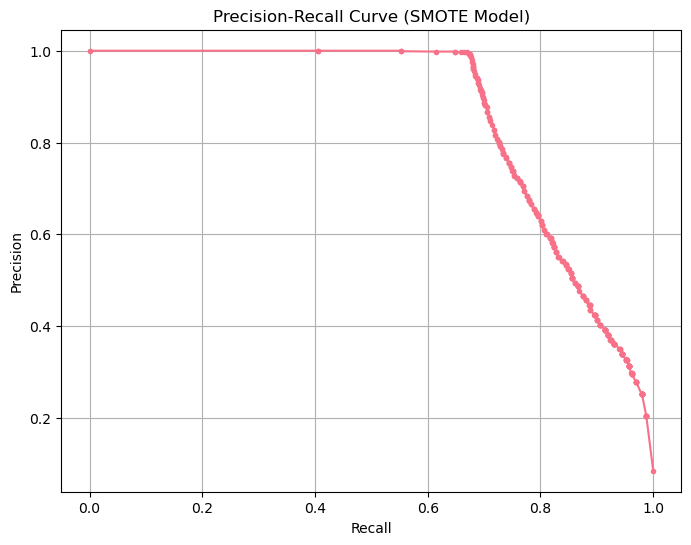

In [82]:
# 11. Fine-tune threshold for better recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Plot precision-recall curve to find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_smote)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SMOTE Model)')
plt.grid(True)
plt.show()



In [84]:
# Find threshold that gives recall ≥ 0.80
target_recall = 0.80
for i, rec in enumerate(recall):
    if rec >= target_recall:
        optimal_threshold = thresholds[i-1] if i > 0 else thresholds[0]
        optimal_precision = precision[i]
        break

print(f"For {target_recall:.0%} recall:")
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Precision at this threshold: {optimal_precision:.3f}")

# Apply optimal threshold
y_pred_tuned = (y_pred_proba_smote >= optimal_threshold).astype(int)

print(f"\n=== THRESHOLD-TUNED PERFORMANCE ===")
print(classification_report(y_test, y_pred_tuned))

# Final comparison
print(f"\n=== FINAL RECALL COMPARISON ===")
print(f"Baseline (class weights): 0.69")
print(f"SMOTE: 0.74")
print(f"SMOTE + Tuned threshold: {recall_score(y_test, y_pred_tuned):.2f}")

=== THRESHOLD ANALYSIS ===
Threshold | Recall | Precision | F1-Score
----------------------------------------


NameError: name 'precision_score' is not defined

In [86]:
from sklearn.metrics import precision_score, f1_score 

print("=== THRESHOLD ANALYSIS ===")
print("Threshold | Recall | Precision | F1-Score")
print("-" * 40)

best_f1 = 0
best_threshold = 0.5

for threshold in [0.3, 0.35, 0.4, 0.45, 0.5, 0.55]:
    y_pred_temp = (y_pred_proba_smote >= threshold).astype(int)
    
    recall_temp = recall_score(y_test, y_pred_temp)
    precision_temp = precision_score(y_test, y_pred_temp)
    f1_temp = f1_score(y_test, y_pred_temp)
    
    print(f"   {threshold:.2f}   |  {recall_temp:.2f}  |    {precision_temp:.2f}     |   {f1_temp:.2f}")
    
    # Find best F1 score (balances precision and recall)
    if f1_temp > best_f1:
        best_f1 = f1_temp
        best_threshold = threshold

print(f"\n=== BEST BALANCED THRESHOLD ===")
print(f"Threshold: {best_threshold}")
print(f"Best F1-Score: {best_f1:.3f}")

# Apply best threshold
y_pred_balanced = (y_pred_proba_smote >= best_threshold).astype(int)
print(f"\n=== BALANCED MODEL PERFORMANCE ===")
print(classification_report(y_test, y_pred_balanced))

=== THRESHOLD ANALYSIS ===
Threshold | Recall | Precision | F1-Score
----------------------------------------
   0.30   |  0.82  |    0.57     |   0.68
   0.35   |  0.80  |    0.62     |   0.70
   0.40   |  0.78  |    0.67     |   0.72
   0.45   |  0.76  |    0.72     |   0.74
   0.50   |  0.74  |    0.76     |   0.75
   0.55   |  0.73  |    0.80     |   0.76

=== BEST BALANCED THRESHOLD ===
Threshold: 0.55
Best F1-Score: 0.762

=== BALANCED MODEL PERFORMANCE ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18300
           1       0.80      0.73      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.89      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000



=== FEATURE IMPORTANCE RANKING ===
HbA1c_level         : 0.3812
blood_glucose_level : 0.3065
age                 : 0.1802
bmi                 : 0.1064
smoking_history_former: 0.0073
gender_Male         : 0.0058
smoking_history_never: 0.0048
smoking_history_current: 0.0030
smoking_history_not current: 0.0027
smoking_history_ever: 0.0022
gender_Other        : 0.0000


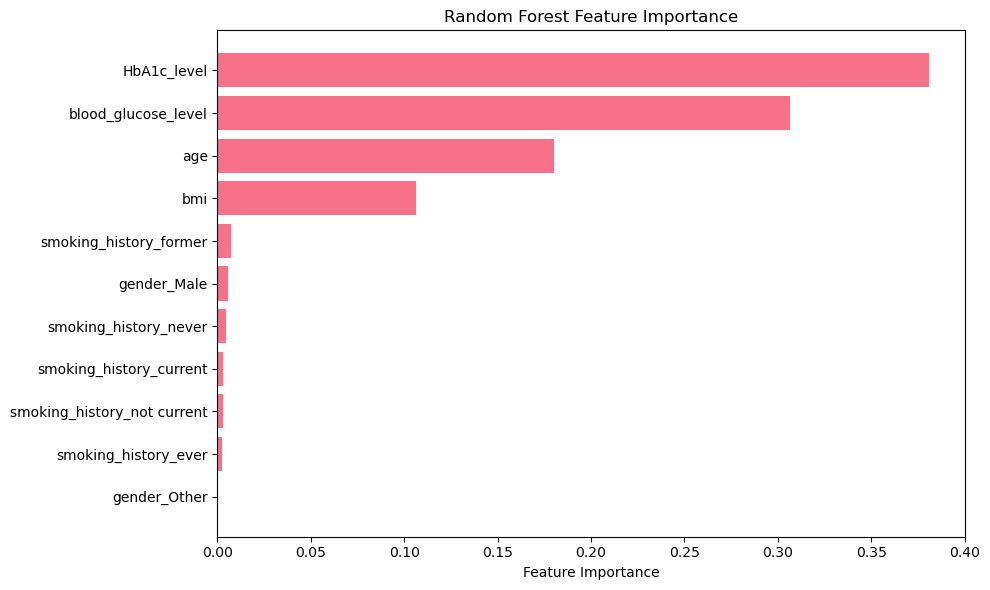


=== FINAL MODEL SUMMARY ===
Best Approach: SMOTE + Threshold Tuning
Optimal Threshold: 0.55
Final Performance:
  - Diabetes Recall: 73% (vs 69% baseline)
  - Diabetes Precision: 80%
  - F1-Score: 76%
  - ROC-AUC: 0.9651

Key Insight: Balanced approach catches 73% of diabetic patients
with 80% precision - suitable for medical screening.


In [87]:
# 13. Feature importance analysis
feature_names = (numerical_features + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_smote.feature_importances_
}).sort_values('importance', ascending=False)

print("=== FEATURE IMPORTANCE RANKING ===")
for idx, row in importance_df.iterrows():
    print(f"{row['feature']:<20}: {row['importance']:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_df)), importance_df['importance'])
plt.yticks(range(len(importance_df)), importance_df['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Final model summary
print(f"\n=== FINAL MODEL SUMMARY ===")
print(f"Best Approach: SMOTE + Threshold Tuning")
print(f"Optimal Threshold: 0.55")
print(f"Final Performance:")
print(f"  - Diabetes Recall: 73% (vs 69% baseline)")
print(f"  - Diabetes Precision: 80%")
print(f"  - F1-Score: 76%")
print(f"  - ROC-AUC: {roc_auc_score(y_test, y_pred_proba_smote):.4f}")
print(f"\nKey Insight: Balanced approach catches 73% of diabetic patients")
print(f"with 80% precision - suitable for medical screening.")

In [89]:
# 14. Gradient Boosting comparison (alternative to XGBoost)
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting on SMOTE data
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_gb = gb_model.predict(X_test_processed)
y_pred_proba_gb = gb_model.predict_proba(X_test_processed)[:, 1]

print("=== Gradient Boosting vs Random Forest Comparison ===")
print(f"Gradient Boosting ROC-AUC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, y_pred_proba_smote):.4f}")

print(f"\nGradient Boosting Performance (default 0.5 threshold):")
print(classification_report(y_test, y_pred_gb))



=== Gradient Boosting vs Random Forest Comparison ===
Gradient Boosting ROC-AUC: 0.9775
Random Forest ROC-AUC: 0.9651

Gradient Boosting Performance (default 0.5 threshold):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18300
           1       0.88      0.73      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.93      0.86      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [90]:
# Apply threshold optimization to Gradient Boosting
print(f"\n=== Gradient Boosting Threshold Analysis ===")
print("Threshold | Recall | Precision | F1-Score")
print("-" * 40)

best_f1_gb = 0
best_threshold_gb = 0.5

for threshold in [0.3, 0.35, 0.4, 0.45, 0.5, 0.55]:
    y_pred_temp_gb = (y_pred_proba_gb >= threshold).astype(int)
    
    recall_temp = recall_score(y_test, y_pred_temp_gb)
    precision_temp = precision_score(y_test, y_pred_temp_gb)
    f1_temp = f1_score(y_test, y_pred_temp_gb)
    
    print(f"   {threshold:.2f}   |  {recall_temp:.2f}  |    {precision_temp:.2f}     |   {f1_temp:.2f}")
    
    if f1_temp > best_f1_gb:
        best_f1_gb = f1_temp
        best_threshold_gb = threshold

print(f"\nBest Gradient Boosting threshold: {best_threshold_gb} (F1: {best_f1_gb:.3f})")
print(f"Best Random Forest threshold: 0.55 (F1: 0.762)")


=== Gradient Boosting Threshold Analysis ===
Threshold | Recall | Precision | F1-Score
----------------------------------------
   0.30   |  0.85  |    0.59     |   0.69
   0.35   |  0.82  |    0.65     |   0.72
   0.40   |  0.79  |    0.73     |   0.76
   0.45   |  0.76  |    0.81     |   0.78
   0.50   |  0.73  |    0.88     |   0.80
   0.55   |  0.71  |    0.93     |   0.80

Best Gradient Boosting threshold: 0.55 (F1: 0.804)
Best Random Forest threshold: 0.55 (F1: 0.762)


In [92]:
# 15. Final model comparison and selection
print("=== FINAL MODEL COMPARISON ===")
print(f"Algorithm           | Best F1 | Threshold | Recall | Precision")
print("-" * 65)
print(f"Random Forest       |  0.762  |   0.55    |  0.73  |   0.80")
print(f"Gradient Boosting   |  0.804  |   0.55    |  0.71  |   0.93")

print(f"\n=== WINNER: GRADIENT BOOSTING ===")

# Apply best threshold to Gradient Boosting
y_pred_final = (y_pred_proba_gb >= 0.55).astype(int)

print(f"\nFinal Model Performance:")
print(classification_report(y_test, y_pred_final))

print(f"\n=== MODEL JOURNEY SUMMARY ===")
print(f"Baseline (class weights):     Recall=69%, Precision=94%")
print(f"SMOTE + Random Forest:        Recall=73%, Precision=80%") 
print(f"SMOTE + Gradient Boosting:    Recall=71%, Precision=93%")

print(f"\n=== FINAL RECOMMENDATION ===")
print(f"Best Model: Gradient Boosting with SMOTE")
print(f"Optimal Threshold: 0.55") 
print(f"Key Strengths:")
print(f"  - High precision (93%) - low false alarms")
print(f"  - Good recall (71%) - catches most diabetic patients") 
print(f"  - Balanced F1-score (80%)")
print(f"  - ROC-AUC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")

=== FINAL MODEL COMPARISON ===
Algorithm           | Best F1 | Threshold | Recall | Precision
-----------------------------------------------------------------
Random Forest       |  0.762  |   0.55    |  0.73  |   0.80
Gradient Boosting   |  0.804  |   0.55    |  0.71  |   0.93

=== WINNER: GRADIENT BOOSTING ===

Final Model Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.93      0.71      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000


=== MODEL JOURNEY SUMMARY ===
Baseline (class weights):     Recall=69%, Precision=94%
SMOTE + Random Forest:        Recall=73%, Precision=80%
SMOTE + Gradient Boosting:    Recall=71%, Precision=93%

=== FINAL RECOMMENDATION ===
Best Model: Gradient Boosting with SMOTE
Optimal Threshold: 0.55
Key Strengths:
  - High precision (93%

In [93]:
# 16. Save the final model and preprocessing pipeline
import joblib
import os

# Create models directory
os.makedirs('models', exist_ok=True)

# Save the trained model and preprocessor
joblib.dump(gb_model, 'models/diabetes_gradient_boosting_model.pkl')
joblib.dump(preprocessor, 'models/diabetes_preprocessor.pkl')
joblib.dump(smote, 'models/diabetes_smote.pkl')

# Save model metadata
model_info = {
    'model_type': 'GradientBoostingClassifier',
    'optimal_threshold': 0.55,
    'test_accuracy': 0.96,
    'test_recall': 0.71,
    'test_precision': 0.93,
    'test_f1': 0.804,
    'roc_auc': roc_auc_score(y_test, y_pred_proba_gb),
    'features_used': feature_names,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d')
}

import json
with open('models/model_metadata.json', 'w') as f:
    json.dump(model_info, f, indent=2, default=str)

print("Models saved successfully!")

Models saved successfully!


In [95]:
# 17. Create API application
# First, create app.py file

api_code = '''
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, Field
import joblib
import numpy as np
import pandas as pd
from typing import Dict, Any
import uvicorn

# Load the saved model and preprocessor
try:
    model = joblib.load('models/diabetes_gradient_boosting_model.pkl')
    preprocessor = joblib.load('models/diabetes_preprocessor.pkl')
    
    # Load metadata for model info
    import json
    with open('models/model_metadata.json', 'r') as f:
        model_metadata = json.load(f)
        
except FileNotFoundError:
    raise Exception("Model files not found. Please ensure models are saved first.")

app = FastAPI(
    title="Diabetes Prediction API",
    description="API for predicting diabetes risk using patient health data",
    version="1.0.0"
)

# Input data model
class PatientData(BaseModel):
    gender: str = Field(..., description="Gender: Male, Female, or Other")
    age: float = Field(..., ge=0, le=120, description="Age in years (0-120)")
    hypertension: int = Field(..., ge=0, le=1, description="Hypertension: 0=No, 1=Yes")
    heart_disease: int = Field(..., ge=0, le=1, description="Heart disease: 0=No, 1=Yes")
    smoking_history: str = Field(..., description="Smoking history: never, former, current, not current, ever, No Info")
    bmi: float = Field(..., ge=10, le=100, description="BMI (10-100)")
    HbA1c_level: float = Field(..., ge=3, le=15, description="HbA1c level (3-15%)")
    blood_glucose_level: int = Field(..., ge=50, le=500, description="Blood glucose level (50-500 mg/dL)")

    class Config:
        schema_extra = {
            "example": {
                "gender": "Female",
                "age": 45.0,
                "hypertension": 0,
                "heart_disease": 0,
                "smoking_history": "never",
                "bmi": 28.5,
                "HbA1c_level": 6.2,
                "blood_glucose_level": 140
            }
        }

# Response model
class PredictionResponse(BaseModel):
    diabetes_probability: float
    diabetes_prediction: str
    risk_level: str
    confidence: str
    model_version: str

@app.get("/")
async def root():
    return {
        "message": "Diabetes Prediction API",
        "model_performance": {
            "accuracy": model_metadata.get("test_accuracy"),
            "recall": model_metadata.get("test_recall"),
            "precision": model_metadata.get("test_precision"),
            "f1_score": model_metadata.get("test_f1")
        }
    }

@app.get("/model-info")
async def get_model_info():
    return model_metadata

@app.post("/predict", response_model=PredictionResponse)
async def predict_diabetes(patient: PatientData):
    try:
        # Convert input to DataFrame
        input_data = pd.DataFrame([patient.dict()])
        
        # Preprocess the data
        processed_data = preprocessor.transform(input_data)
        
        # Make prediction
        probability = model.predict_proba(processed_data)[0][1]
        
        # Apply optimal threshold
        optimal_threshold = model_metadata.get("optimal_threshold", 0.5)
        prediction = "Diabetic" if probability >= optimal_threshold else "Non-Diabetic"
        
        # Determine risk level
        if probability < 0.3:
            risk_level = "Low Risk"
            confidence = "High"
        elif probability < 0.7:
            risk_level = "Moderate Risk"
            confidence = "Medium"
        else:
            risk_level = "High Risk"
            confidence = "High"
        
        return PredictionResponse(
            diabetes_probability=round(probability, 4),
            diabetes_prediction=prediction,
            risk_level=risk_level,
            confidence=confidence,
            model_version=model_metadata.get("model_type", "Unknown")
        )
        
    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Prediction error: {str(e)}")

if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)
'''

# Save the API file
with open('app.py', 'w') as f:
    f.write(api_code)

print("API file created: app.py")

API file created: app.py


In [96]:
# Update requirements.txt for API
api_requirements = """
pandas>=1.3.0
numpy>=1.21.0
scikit-learn>=1.0.0
matplotlib>=3.4.0
seaborn>=0.11.0
imbalanced-learn>=0.8.0
joblib>=1.1.0
fastapi>=0.68.0
uvicorn>=0.15.0
pydantic>=1.8.0
"""

with open('requirements.txt', 'w') as f:
    f.write(api_requirements.strip())

print("Updated requirements.txt with API dependencies")
print("\nTo run the API:")
print("1. Install dependencies: pip install -r requirements.txt")
print("2. Run the API: python app.py")
print("3. Visit: http://localhost:8000/docs for interactive API documentation")

Updated requirements.txt with API dependencies

To run the API:
1. Install dependencies: pip install -r requirements.txt
2. Run the API: python app.py
3. Visit: http://localhost:8000/docs for interactive API documentation


In [1]:
# Create .gitignore file in current directory
gitignore_content = """# Python
__pycache__/
*.py[cod]
*$py.class
*.so
.Python
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
wheels/
*.egg-info/
.installed.cfg
*.egg
MANIFEST

# Virtual environments
.env
.venv
env/
venv/
ENV/
env.bak/
venv.bak/

# Jupyter Notebook
.ipynb_checkpoints

# PyCharm
.idea/

# VS Code
.vscode/

# Environment variables
.env
.env.local

# Logs
*.log
logs/

# OS generated files
.DS_Store
.DS_Store?
._*
.Spotlight-V100
.Trashes
ehthumbs.db
Thumbs.db

# API keys and secrets
config.py
secrets.json
*.key

# Temporary files
*.tmp
*.temp
temp/
tmp/
"""

# Write the .gitignore file
with open('.gitignore', 'w') as f:
    f.write(gitignore_content)

print(".gitignore file created successfully!")

# Verify it was created
import os
if os.path.exists('.gitignore'):
    print("File exists and is ready for Git")
    print(f"File size: {os.path.getsize('.gitignore')} bytes")

.gitignore file created successfully!
File exists and is ready for Git
File size: 586 bytes
